In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csestat-416-21sp-assignment-6/edX_column_description.pdf
/kaggle/input/csestat-416-21sp-assignment-6/edx_test.csv
/kaggle/input/csestat-416-21sp-assignment-6/edx_train.csv


# CSE416 A6
### Jason Park
### Team Name: justjoking
### Kaggle username: jasonp24

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load in the data and preview it
edx = pd.read_csv('/kaggle/input/csestat-416-21sp-assignment-6/edx_train.csv')
edx.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130545492,1,1,1,1,United States,Master's,1984.0,m,1,3/10/13,7/29/13,1161.0,50.0,NaN,12.0,0
1,HarvardX/ER22x/2013_Spring,MHxPC130536944,1,1,1,1,United Kingdom,Master's,1985.0,f,0.85,3/13/13,8/1/13,1360.0,10.0,NaN,29.0,0
2,HarvardX/CS50x/2012,MHxPC130442298,1,1,1,1,India,NaN,NaN,NaN,1,8/2/12,7/25/13,77.0,18.0,NaN,7.0,0
3,HarvardX/ER22x/2013_Spring,MHxPC130273564,1,1,1,1,United Kingdom,Bachelor's,1982.0,m,0.85,1/23/13,8/13/13,1425.0,29.0,NaN,34.0,0
4,HarvardX/CS50x/2012,MHxPC130247761,1,1,0,0,United States,Secondary,1989.0,m,0,3/5/13,3/5/13,6.0,1.0,NaN,1.0,0


In [4]:
# Explore data distribution of variables
edx['LoE_DI'].value_counts()

Bachelor's             2954
Master's               2325
Secondary              1989
Doctorate               315
Less than Secondary     209
Name: LoE_DI, dtype: int64

In [5]:
# Replace all empty strings -> NaN
edx['grade'].replace(' ', np.nan, inplace=True)
edx['LoE_DI'].replace(' ', np.nan, inplace=True)

# Replace all NaN values -> 0
edx = edx.fillna(0)

In [6]:
# Check if there are any NaN values
print(edx.isnull().values.any())

# Print out data types of columns
print(edx.dtypes)

False
course_id             object
userid_DI             object
registered             int64
viewed                 int64
explored               int64
certified              int64
final_cc_cname_DI     object
LoE_DI                object
YoB                  float64
gender                object
grade                 object
start_time_DI         object
last_event_DI         object
nevents              float64
ndays_act            float64
nplay_video          float64
nchapters            float64
nforum_posts           int64
dtype: object


In [7]:
# Assign grades = 0 -> -1 and grades > 0 -> +1
edx['completed'] = edx['grade'].apply(lambda grade : 1 if pd.to_numeric(grade) > 0 else 0)

In [8]:
# observe completed and incompleted data length
only_completed = edx[edx['completed'] == 1]
only_incomplete = edx[edx['completed'] == -1]

print(len(only_completed))
print(len(only_incomplete))
print(edx.shape)

4170
0
(8758, 19)


## Feature Engineering for ML

In [9]:
# Encoding Categorical Features
features = [
    'registered',
    'viewed',
    'explored',
    'LoE_DI',
    'nevents',
    'ndays_act',
    'nchapters']

target = 'completed'

edx = edx[features + [target]]
edx.head()

,registered,viewed,explored,LoE_DI,nevents,ndays_act,nchapters,completed
0,1,1,1,Master's,1161.0,50.0,12.0,1
1,1,1,1,Master's,1360.0,10.0,29.0,1
2,1,1,1,0,77.0,18.0,7.0,1
3,1,1,1,Bachelor's,1425.0,29.0,34.0,1
4,1,1,0,Secondary,6.0,1.0,1.0,0


In [10]:
# one hot encoding: transform categorical data (education) to numeric data
edx = pd.get_dummies(edx, columns =['LoE_DI'])
features = list(edx.columns)
features.remove('completed')
features

edx.head()

,registered,viewed,explored,nevents,ndays_act,nchapters,completed,LoE_DI_0,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary
0,1,1,1,1161.0,50.0,12.0,1,0,0,0,0,1,0
1,1,1,1,1360.0,10.0,29.0,1,0,0,0,0,1,0
2,1,1,1,77.0,18.0,7.0,1,1,0,0,0,0,0
3,1,1,1,1425.0,29.0,34.0,1,0,1,0,0,0,0
4,1,1,0,6.0,1.0,1.0,0,0,0,0,0,0,1


In [11]:
# Explore shape of array
edx[features].shape

(8758, 12)

In [12]:
# Explore shape of array
edx[target].shape

(8758,)

The features that I determined were most important and that I included in my model were those found within the Features array. I chose these features after examining the distribution of data for all features, and determined that the chosen features would most likely have the greatest impact on determining whether a student finished a course or not. I also used one-hot encoding to change the Education feature from a category to numeric values so that it could be learned from an ML model.

# Training a Logistic Regression Model

In [13]:
from sklearn.model_selection import train_test_split
# 80/20 test/train split
train_data, test_data = train_test_split(edx, test_size=0.2)

In [14]:
# train model using logistic regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(train_data[features], train_data[target])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [15]:
# predict output using logistic regression
prediction_logreg = LogReg.predict(test_data[features])

In [16]:
# view printed out prediction in array form
prediction_logreg

array([1, 0, 1, ..., 0, 1, 0])

In [17]:
# Check accuracy score of logistic regression model
from sklearn.metrics import accuracy_score

y_true = test_data[target]
y_pred = LogReg.predict(test_data[features])

model_accuracy = accuracy_score(y_true, y_pred)

print(model_accuracy)

0.9594748858447488


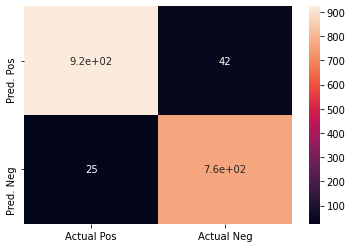

In [18]:
# Code Source: CSE 416 HW 3 - Sentiment Analysis with Logistic Regression

def plot_confusion_matrix(tp, fp, fn, tn):
    """
    Plots a confusion matrix using the values 
       tp - True Positive
       fp - False Positive
       fn - False Negative
       tn - True Negative
    """
    data = np.matrix([[tp, fp], [fn, tn]])

    sns.heatmap(data,annot=True,xticklabels=['Actual Pos', 'Actual Neg']
              ,yticklabels=['Pred. Pos', 'Pred. Neg']) 



# TODO Compute the four values tp, fp, fn, tn and plot them using plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

tp = 923
fp = 42
fn = 25
tn = 762

plot_confusion_matrix(tp, fp, fn, tn)

The visualization of the logisitc regression model above shows that there are a high amount of true positive, meaning high accuracy from the model, and a low amount of false positives and false negatives, which would be where our model was incorrect

## Training Decision Tree Model

In [19]:
# hyperparameter tuning to find right fit parameters for decision tree model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

min_samples_leaf = [1, 10, 50, 100, 200, 300]
max_depth = [1, 5, 10, 15, 20]

hyperparameters = {'min_samples_leaf': min_samples_leaf,
                    'max_depth': max_depth}

decision_tree_model = DecisionTreeClassifier()

search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = hyperparameters, cv = 6, return_train_score=True)

search.fit(train_data[features], train_data[target])
print(search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 10}


In [20]:
# train decision tree model
decision_tree_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
decision_tree_model.fit(train_data[features], train_data[target])

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [21]:
# predict output using decision tree model
tree_predictions = decision_tree_model.predict(test_data[features])

In [22]:
# print out predictions for decision tree
tree_predictions

array([1, 0, 1, ..., 0, 1, 0])

In [23]:
# print out accuracy of decision tree model predictions
decision_train_accuracy = decision_tree_model.score(train_data[features], train_data[target])
print(decision_train_accuracy)
decision_test_accuracy = decision_tree_model.score(test_data[features], test_data[target])
print(decision_test_accuracy)

0.9750214102198116
0.9720319634703196


## Training Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# train random forest classifier model
random_forest = RandomForestClassifier()
random_forest.fit(train_data[features], train_data[target])

RandomForestClassifier()

In [25]:
random_forest_prediction = random_forest.predict(test_data[features])

In [26]:
random_forest_prediction

array([1, 0, 1, ..., 0, 1, 0])

In [27]:
random_train_accuracy = random_forest.score(train_data[features], train_data[target])
print(random_train_accuracy)
random_test_accuracy = random_forest.score(test_data[features], test_data[target])
print(random_test_accuracy)

0.9997145304025121
0.9680365296803652


## Tree Visualization

Depth 1
Depth 3
Depth 5
Depth 7
Depth 9
Depth 11
Depth 13
Depth 15
Depth 17
Depth 19
Depth 21
Depth 23
Depth 25


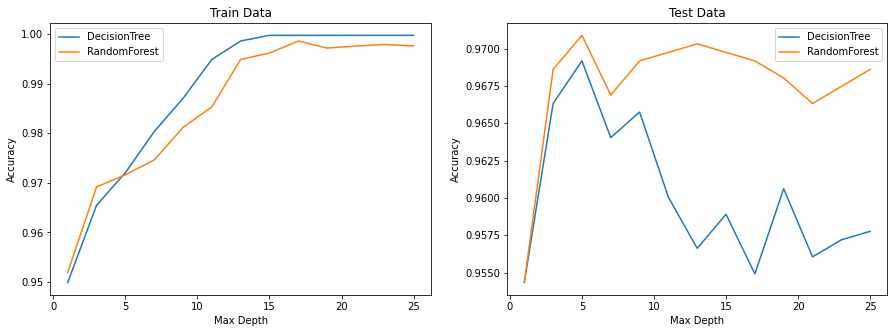

In [28]:
# Code Source: CSE 416: HW 5 - Loan Safety with Decision Trees

# First calculate the accuracies for each depth
depths = list(range(1, 26, 2))
dt_accuracies = []
rf_accuracies = []

for i in depths:
    print(f'Depth {i}')

    # Train and evaluate a Decision Tree Classifier with given max_depth
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(train_data[features], train_data[target])
    dt_accuracies.append((
        accuracy_score(tree.predict(train_data[features]), train_data[target]),
        accuracy_score(tree.predict(test_data[features]), test_data[target])
    ))
    
    # Train and evaluate our RandomForest classifier with given max_depth 
    rf = RandomForestClassifier(15, max_depth=i)
    rf.fit(train_data[features], train_data[target])
    rf_accuracies.append((     
        accuracy_score(rf.predict(train_data[features]), train_data[target]),
        accuracy_score(rf.predict(test_data[features]), test_data[target])
    ))
    
# Then plot the scores
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training accuracies
axs[0].plot(depths, [acc[0] for acc in dt_accuracies], label='DecisionTree')
axs[0].plot(depths, [acc[0] for acc in rf_accuracies], label='RandomForest')

# Plot validation accuracies
axs[1].plot(depths, [acc[1] for acc in dt_accuracies], label='DecisionTree')
axs[1].plot(depths, [acc[1] for acc in rf_accuracies], label='RandomForest')

# Customize plots
axs[0].set_title('Train Data')
axs[1].set_title('Test Data')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Accuracy')

The visualizations of the Decision Tree and Random Forest models above show that while the Decision Tree performs with higher accuracy compared to the Random Forest model on the Training Data, the Random Forest model performs slightly better when using the Test Data

## Kaggle File Submittion

In [29]:
df_test = pd.read_csv('/kaggle/input/csestat-416-21sp-assignment-6/edx_test.csv')

# Any code to pre-process the data 
to_save = df_test[['userid_DI']].copy()

# Replace all empty strings -> NaN
df_test['grade'].replace(' ', np.nan, inplace=True)
df_test['LoE_DI'].replace(' ', np.nan, inplace=True)

# Replace all NaN values -> 0
df_test = df_test.fillna(0)

# Assign grades = 0 -> -1 and grades > 0 -> +1
df_test['completed'] = df_test['grade'].apply(lambda grade : 1 if pd.to_numeric(grade) > 0 else 0)

# Encoding Categorical Features
features = [
    'registered',
    'viewed',
    'explored',
    'LoE_DI',
    'nevents',
    'ndays_act',
    'nchapters']


target = 'completed'

df_test = df_test[features + [target]]

# one hot encoding: transform categorical data (education) to numeric data
df_test = pd.get_dummies(df_test, columns =['LoE_DI'])
features = list(df_test.columns)
features.remove('completed')


# The code to make the predictions on the test data 
# (likely something like model.predict(...))
predictions = random_forest.predict(df_test[features])

#to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# Responses

## Changes from initial model
One change I implemented was to use one-hot encoding in order to include the Education variable in my ML models. Originally, I had left this variable out because it was a categorical variable, but using one-hot encoding, I was able to change it to a numeric value that improved the accuracy of my ML models.

## Ethical Implications
One ethical consideration that I would think about before acting upon the plan laid out in the specs is that access to education is not equitable for all people globally. For example, some participants may not have been in the financial position to have had the choice to attend college or not, and therefore, their highest level of education may have been up to High School. However, this does not mean that that person is not as capable of completing the online courses as someone who graduated from college. Also, by choosing to tailor course material towards a specific group means that you are choosing to make your educational material less accessible for all, which is an issue in education equity.